### ТЕМА: Мультиклассовое прогнозирование исходов цирроза

Цирроз - конечная стадия прогрессирующего фиброза (рубцевания) печени, когда нормальная ткань заменяется фиброзной тканью. Это приводит к нарушению всех жизненно важных функций печени. Так как состояние цирроза изменчиво, то модель должна оценить риск на основе текущего состояния пациента по его показателям.

Цирроз невозможно вылечить полностью, медикаментозно можно замедлить прогрессирование заболевания на начальной стадии. В терминальной стадии единственным радикальным методом лечения является трансплантация печени. 

Модель предсказывает вероятность одного из трех исходов заболевания:
- C - пациент был жив *N_Days*
- CL - пациент был жив *N_Days* благодаря трансплантации печени
- D - пациент умер через *N_Days*

В датасете в качестве признаков предложено несколько клинических показателей. Кратко опишем некоторые из них, чтобы понять их влияние на работу печени.
- Лекарство (Drug) - тип получаемого лечения: D-пеницилламин или плацебо;
- Асцит (Ascites) - наличие жидкости в брюшной полости, в норме - отсутствует;
- Гепатомегалия (Hepatomegaly) - увеличение печени, в норме - отсутствует;
- Сосудистые звездочки (Spiders) - наличие сосудистых звёздочек на коже, в норме - отсутствует;
- Отёки (Edema) - наличие отёков, в норме - отсутствует;
- Билирбин (Bilirubin) - прямой маркер функции печени, **один из ключевых факторов**: чем выше, тем хуже, в норме 0.2 - 1.2 мг/дл;
- Холестерин (Cholesterol) - уровень холестерина: может быть снижен или сильно повышен, в норме < 200 мг/дл;
- Альбумин (Albumin) - показывает синтетическую функцию печени, **один из ключевых факторов**: чем ниже, тем хуже, в норме 3.5 - 5.2 г/дл;
- Медь (Copper) - уровень меди в крови, важен при болезни Вильсона (редкая причина цирроза, резко повышается), в норме 70 - 150 мкг/дл;
- Щелочная фосфатаза (Alk_Phos) - уровень щелочной фосфатазы, обычно нарушается при нарушении оттока желчи, в норме 40 - 130 Ед/л;
- Аспартатаминотрансфераза (SGOT) - фермент печени, маркер повреждения клеток печени, в норме 5 - 40 Ед/л;
- Триглицериды (Tryglicerides) - уровень триглицеридов в крови (доп. параметр, не очень важен), в норме < 150 мг/дл;
- Тромбоциты (Platelets) - количество тромбоцитов в крови, низкое число указывает на признак цирроза, в норме 150 - 400 × 10⁹/л;
- Протромбиновое время (Prothrombin) - время свёртывания крови, **критически важный признак**: чем выше, тем хуже прогноз, в норме 9.4 – 12.5 секунд;
- Стадия цирроза (Stage) - гистологическая стадия фиброза от 1 до 4, где 4 - цирроз печени.

Цирроз печени - одна из ведущих причин смерти во всём мире. Ежегодно от цирроза печени умирает более 1,5 миллионов человек в мире. 

**Средняя общая выживаемость пациентов, рассчитанная по всем стадиям цирроза:**

- 5-летняя выживаемость - 50-60 %
- 10-летняя выживаемость - 35-40 %

Данная выживаемость имеет большие разбросы и сильно зависит причин цирроза и доступности медицинской помощи.

**Статистика выживания по стадиям**
1. Компенсированный цирроз (нет симптомов)

    - 1-летняя: ~ 95-100%
    - 5-летняя: ~ 70-85%
    - 10-летняя: ~ 50%

2. Декомпенсированный цирроз (появляются признаки и первые осложнения)

    - 1-летняя: ~ 50-60%
    - 3-летняя: ~ 35-45%
    - 5-летняя: ~ 20-30%


### Общее описание датасета

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [217]:
data = pd.read_csv('../../data/train.csv')

In [218]:
data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [219]:
desc_df = data.describe(include="all")
desc_df = desc_df.T
desc_df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7905.0,NaN,NaN,NaN,3952.0,2282.121272,0.0,1976.0,3952.0,5928.0,7904.0
N_Days,7905.0,NaN,NaN,NaN,2030.173308,1094.233744,41.0,1230.0,1831.0,2689.0,4795.0
Drug,7905,2,Placebo,4010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,7905.0,NaN,NaN,NaN,18373.14649,3679.958739,9598.0,15574.0,18713.0,20684.0,28650.0
Sex,7905,2,F,7336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ascites,7905,2,N,7525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatomegaly,7905,2,Y,4042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spiders,7905,2,N,5966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edema,7905,3,N,7161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilirubin,7905.0,NaN,NaN,NaN,2.594485,3.81296,0.3,0.7,1.1,3.0,28.0


In [220]:
#установим в качестве индексов id
data.set_index('id', inplace=True)
#типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status       

In [221]:
data.shape

(7905, 19)

In [222]:
data.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')

In [223]:
#Проверка на дубликаты
data.duplicated().sum()

np.int64(0)

### Распределение на числовые и категориальные данные

In [224]:
#целевая переменная
y = data['Status'] 

cat_data = data.select_dtypes('object').columns
num_data = data.select_dtypes(['float64', 'int64']).columns

print("Категориальные признаки:")
print(data[cat_data].head())
print()
print("Числовые признаки:")
print(data[num_data].head())

Категориальные признаки:
               Drug Sex Ascites Hepatomegaly Spiders Edema Status
id                                                               
0   D-penicillamine   M       N            N       N     N      D
1           Placebo   F       N            N       N     N      C
2           Placebo   F       N            Y       Y     Y      D
3           Placebo   F       N            N       N     N      C
4           Placebo   F       N            Y       N     N      C

Числовые признаки:
    N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
id                                                                             
0      999  21532        2.3        316.0     3.35   172.0    1601.0  179.80   
1     2574  19237        0.9        364.0     3.54    63.0    1440.0  134.85   
2     3428  13727        3.3        299.0     3.55   131.0    1029.0  119.35   
3     2576  18460        0.6        256.0     3.50    58.0    1653.0   71.30   
4      788  1

*Stage* принимает только 4 значения, поэтому его отнесём к категориальным переменным, а целевую переменную наоборот уберём из категориальных:

In [225]:
num_data = num_data.drop(['Stage'])
new_cat_data = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
cat_data = data[new_cat_data].columns


print("Категориальные признаки:")
print(data[cat_data].columns)
print()
print("Числовые признаки:")
print(data[num_data].columns)

Категориальные признаки:
Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage'], dtype='object')

Числовые признаки:
Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')


### Анализ числовых признаков

In [226]:
data[num_data].describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462
std,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000


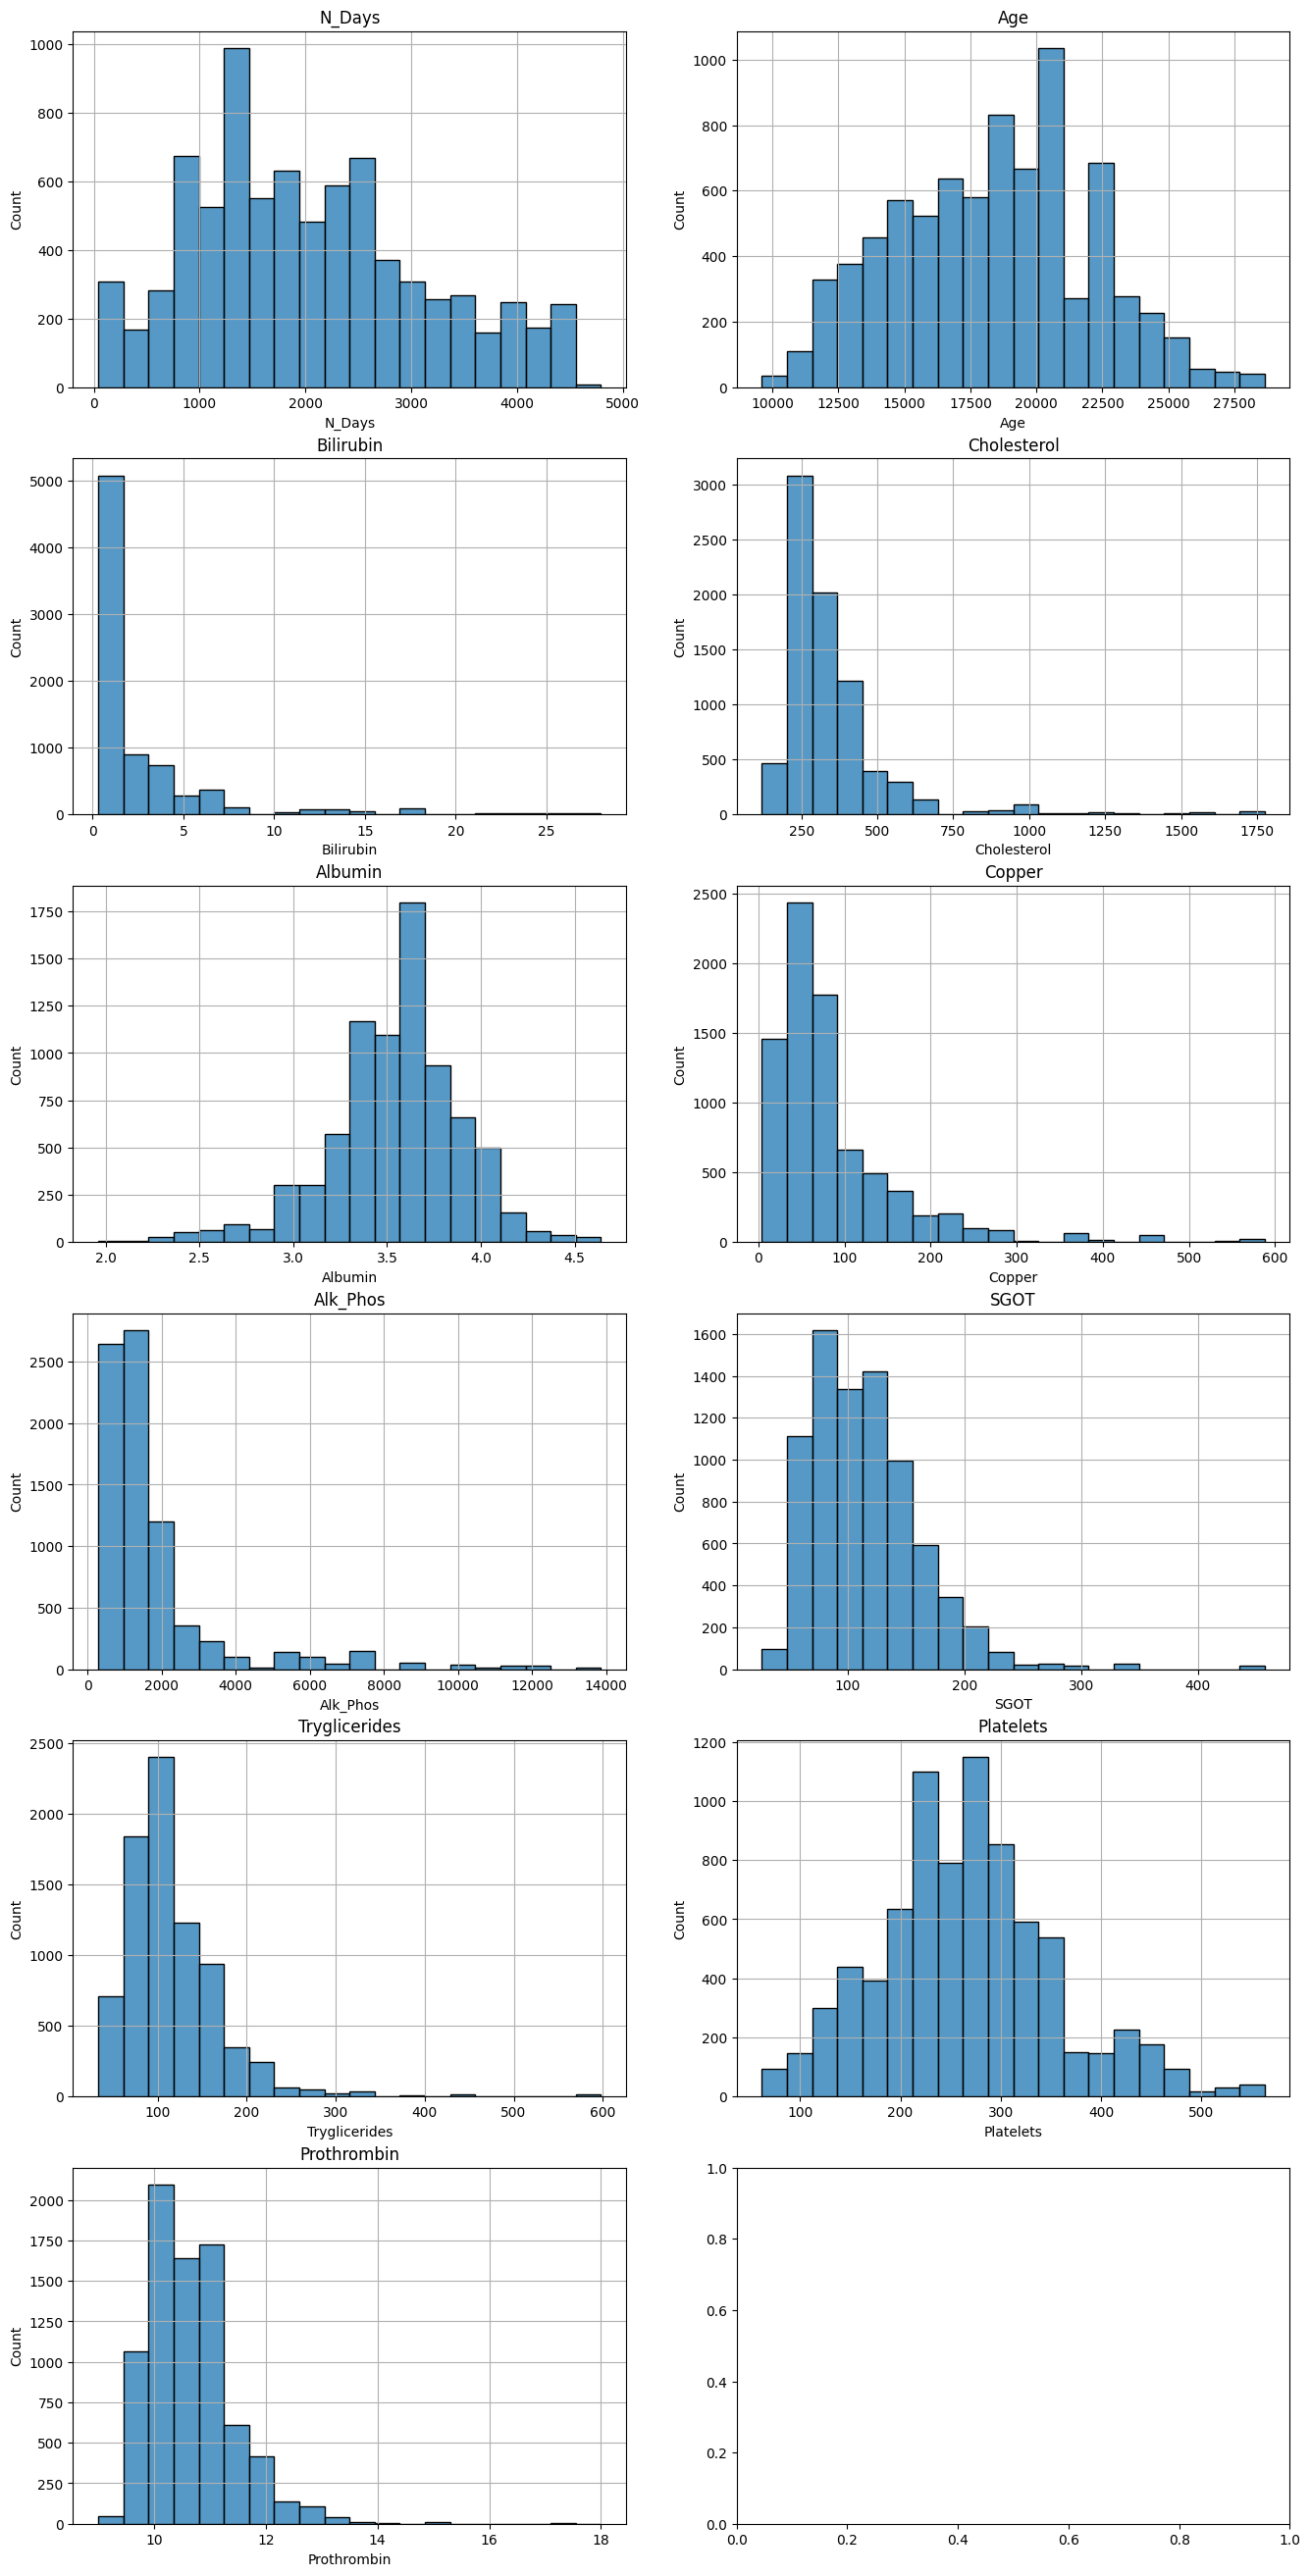

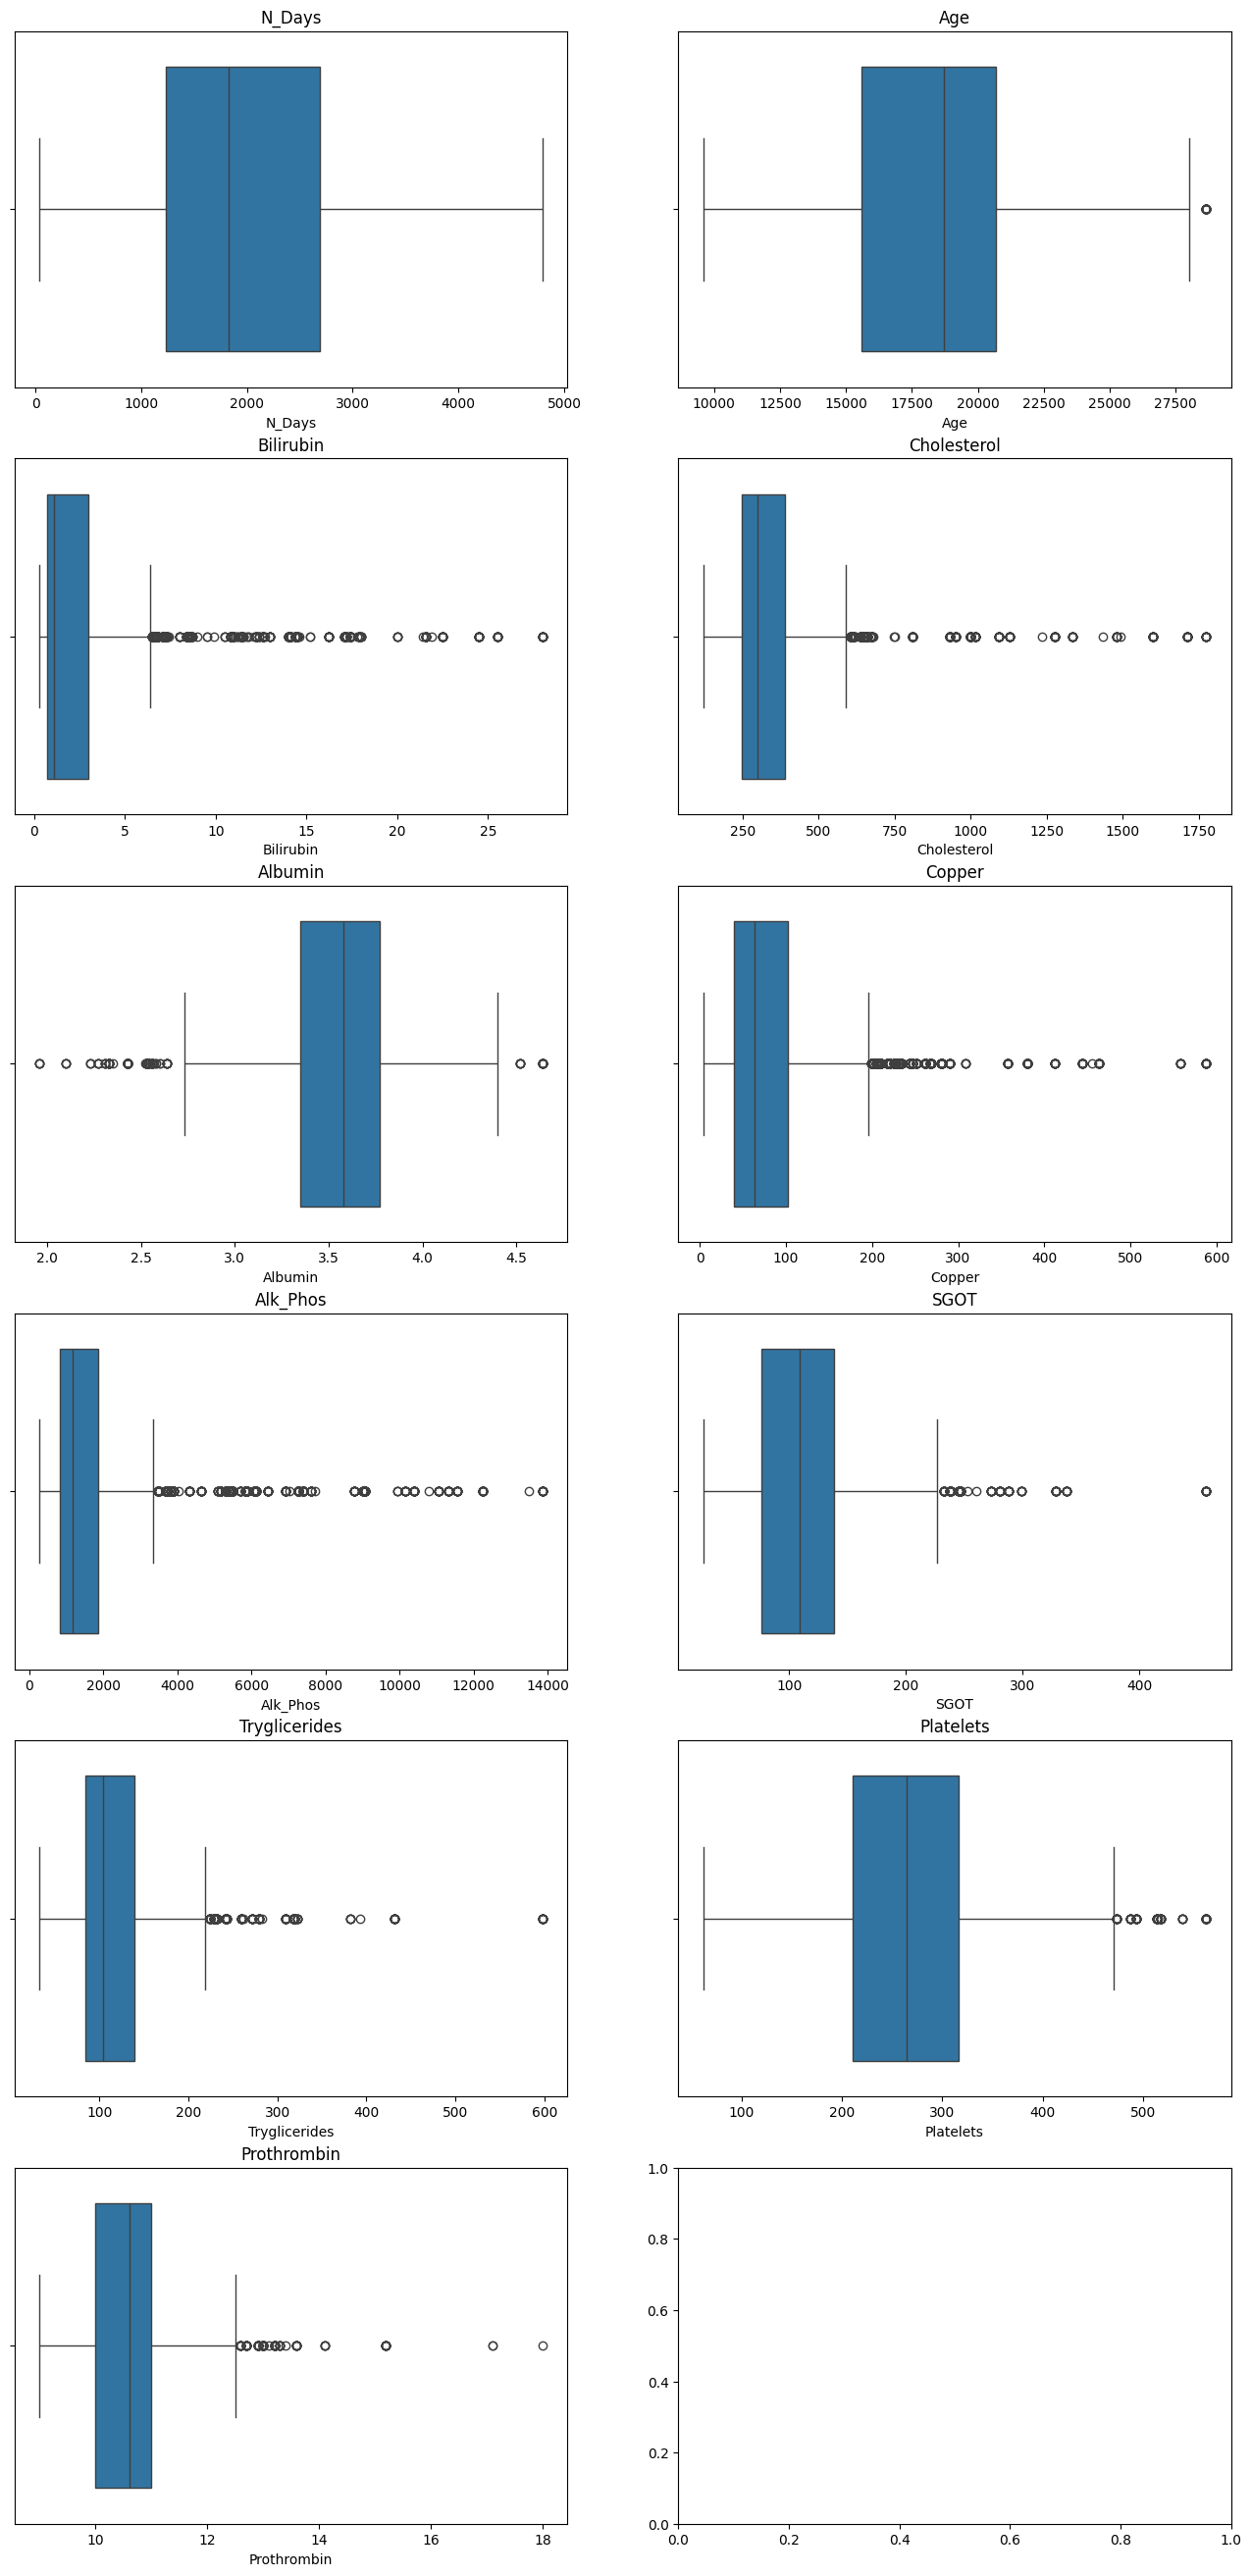

In [242]:
width = 2
height = int(np.ceil(len(num_data)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,33))
fig1, ax1 = plt.subplots(nrows=height, ncols=width, figsize=(16,33))


for idx, column_name in enumerate(num_data):
    plt.figure(fig)
    plt.subplot(height,width, idx+1)
    sns.histplot(data=data, x=column_name, bins=20)
    plt.title(column_name)
    plt.grid()

    plt.figure(fig1)
    plt.subplot(height,width, idx+1)
    sns.boxplot(x=data[column_name])
    plt.title(column_name)

### Проверка на пропуски

In [228]:
data[num_data].isna().sum()

N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64

In [229]:
data[num_data].eq(0).sum()

N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64

### Анализ категориальных признаков

In [230]:
data[cat_data].describe(include="all")

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
count,7905,7905,7905,7905,7905,7905,7905.000000
unique,2,2,2,2,2,3,NaN
top,Placebo,F,N,Y,N,N,NaN
freq,4010,7336,7525,4042,5966,7161,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.032511
std,NaN,NaN,NaN,NaN,NaN,NaN,0.866511
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


Все признаки бинарные кроме *Edema*.

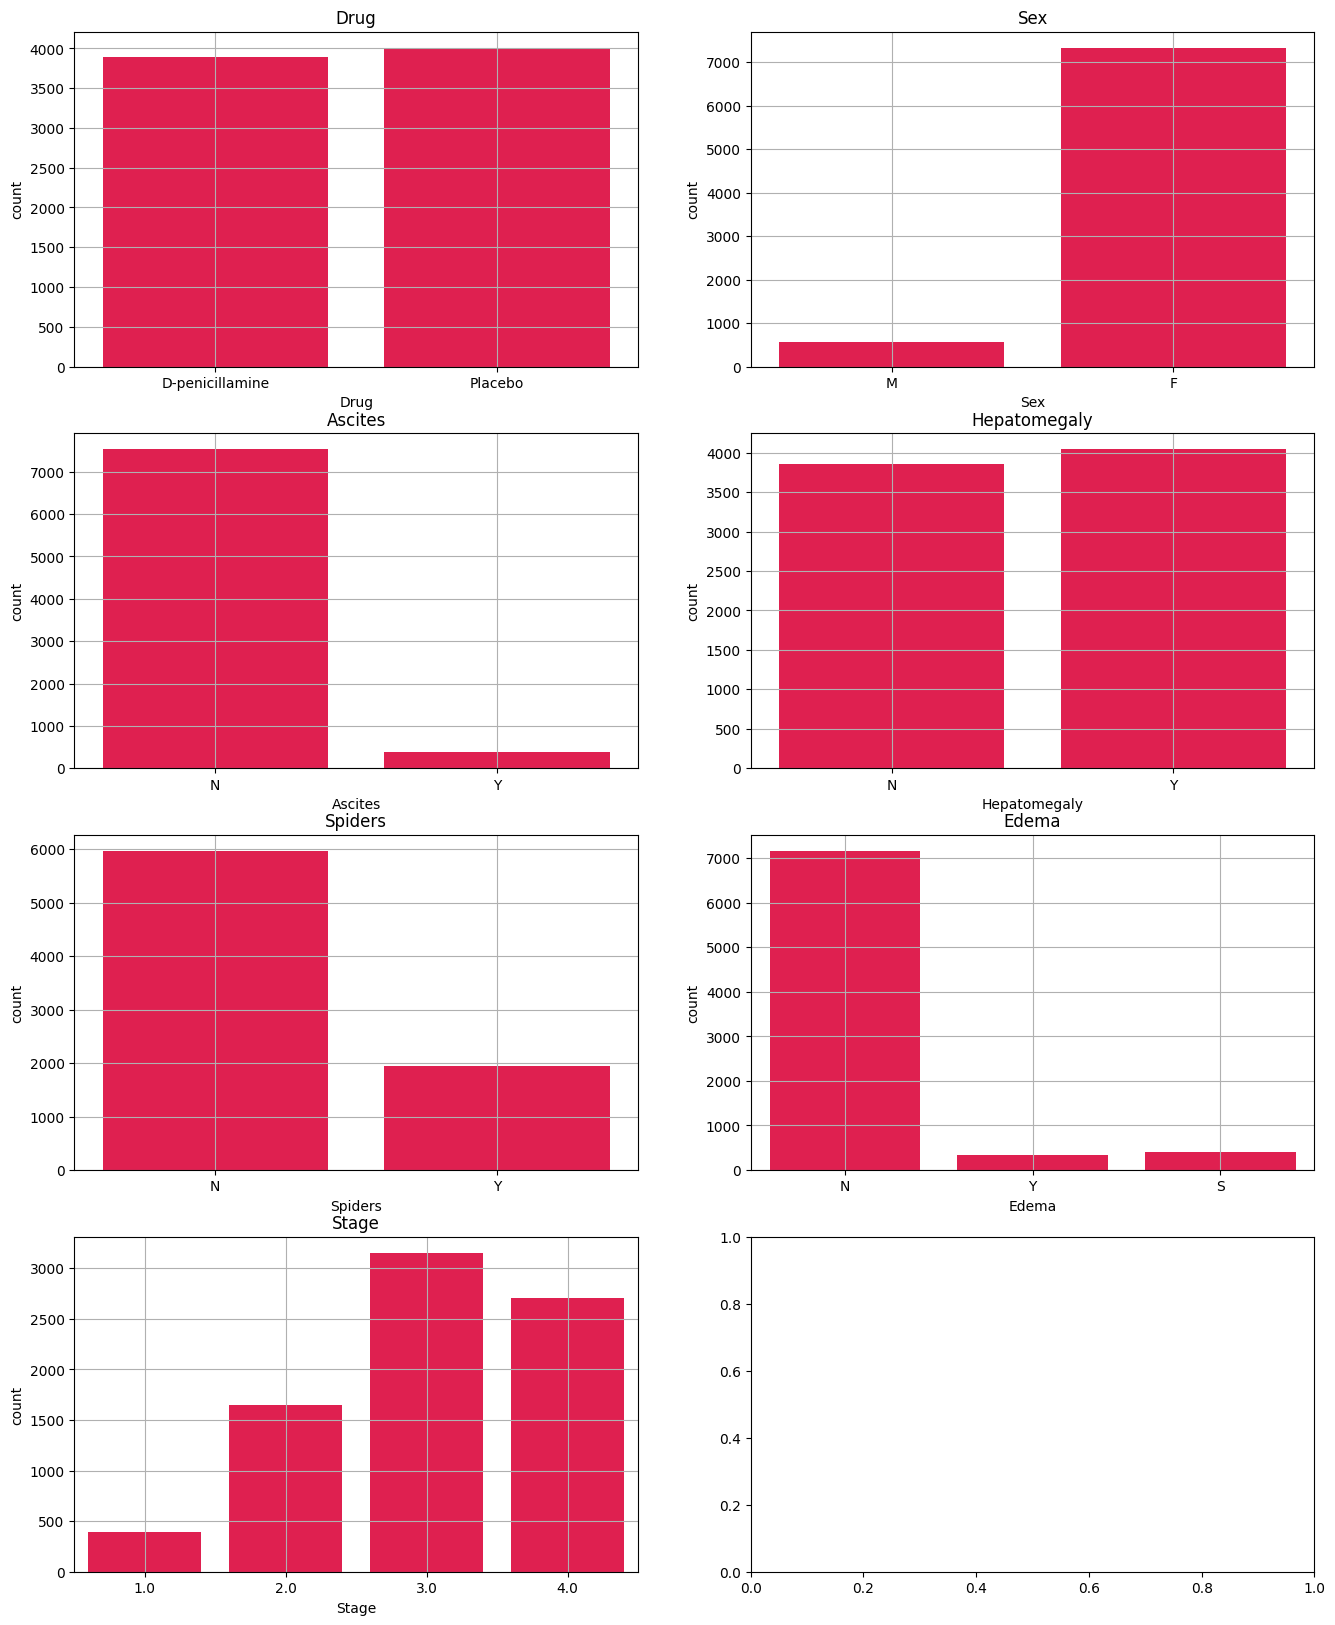

In [231]:
width = 2
height = int(np.ceil(len(cat_data)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,20))

for idx, column_name in enumerate(cat_data):
    plt.figure(fig)
    plt.subplot(height,width, idx+1)
    sns.countplot(x=data[column_name], color="#FF0040")
    plt.title(column_name)
    plt.grid()




Text(0.5, 1.0, 'Status')

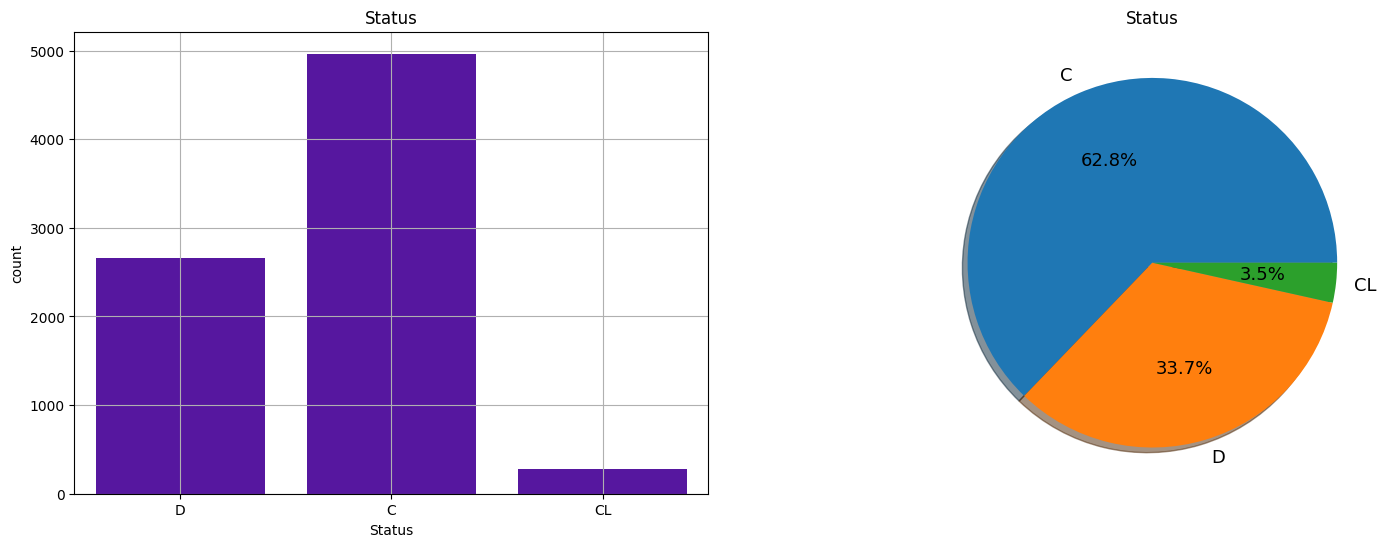

In [232]:
#Распределение целевой переменной
y = data['Status']
y_count = y.value_counts()
# print(list(y_count.index))
y_label = list(y_count.index)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(x=data['Status'], color="#5500B6", ax=ax[0])
ax[0].set_title('Status')
ax[0].grid()

ax[1].pie(y_count, labels = y_label, shadow=True, autopct='%1.1f%%', textprops={'fontsize': 13})
ax[1].set_title('Status')


In [233]:
data[cat_data].isna().sum()

Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
Stage           0
dtype: int64

### Зависимости от целевой переменной

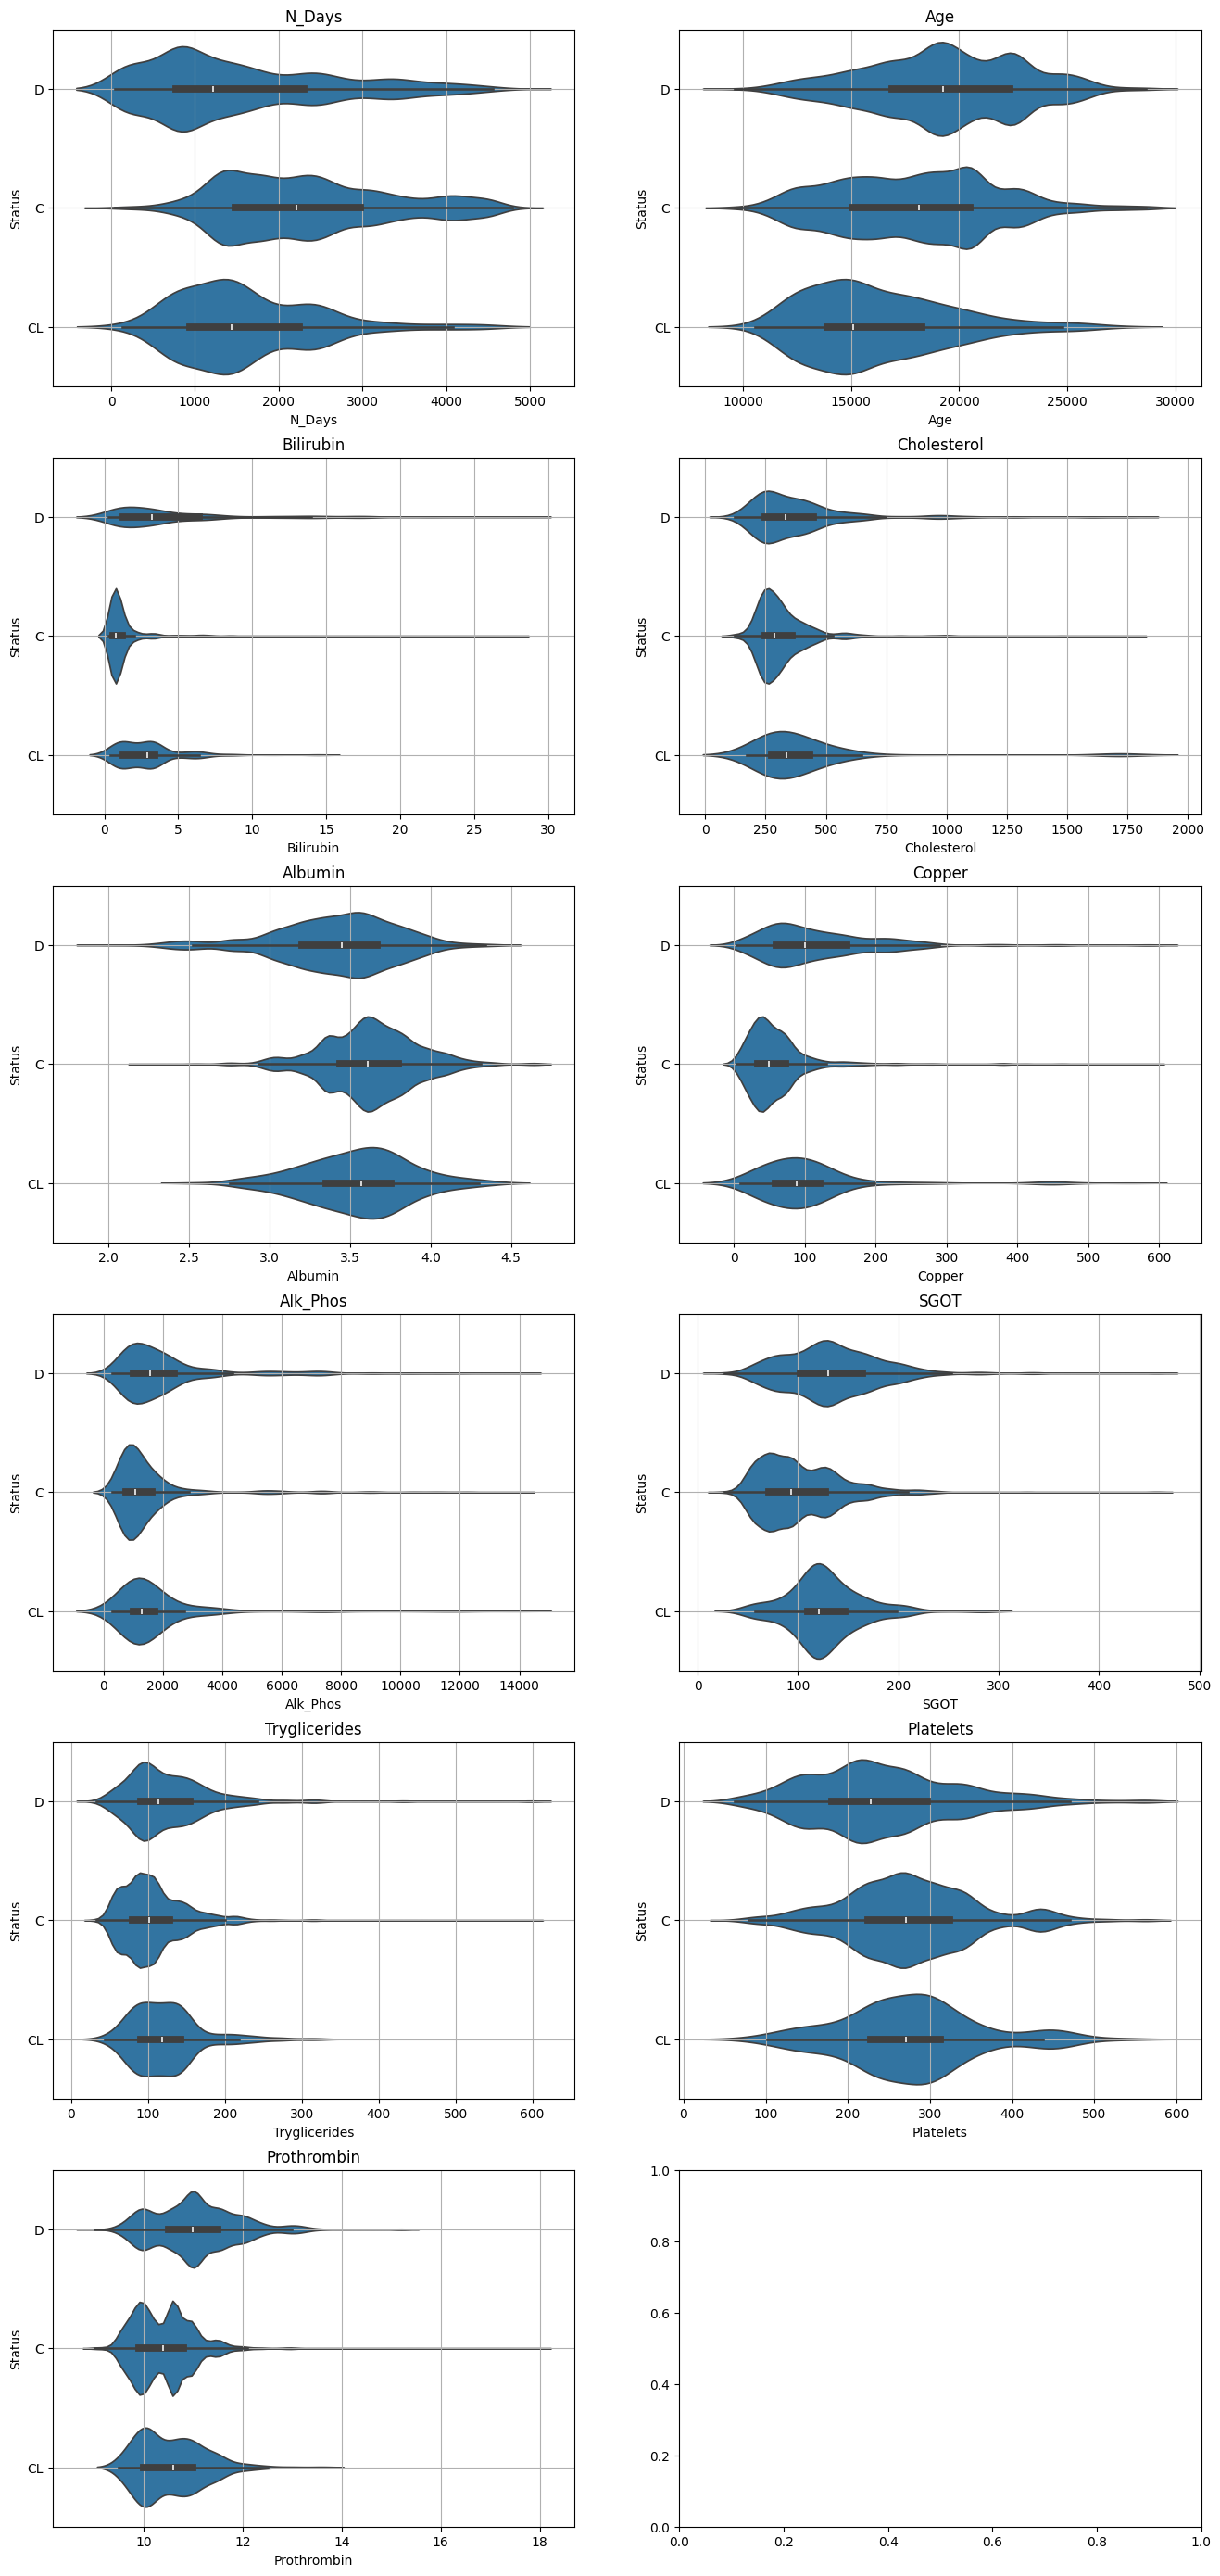

In [234]:
width = 2
height = int(np.ceil(len(num_data)/width))
fig, axes = plt.subplots(nrows=height, ncols=width, figsize=(16,35))
axes_ravel = axes.ravel()
for idx, column_name in enumerate(num_data):
    sns.violinplot(x=data[column_name], y=y, ax=axes_ravel[idx])
    axes_ravel[idx].set_title(column_name)
    axes_ravel[idx].grid()

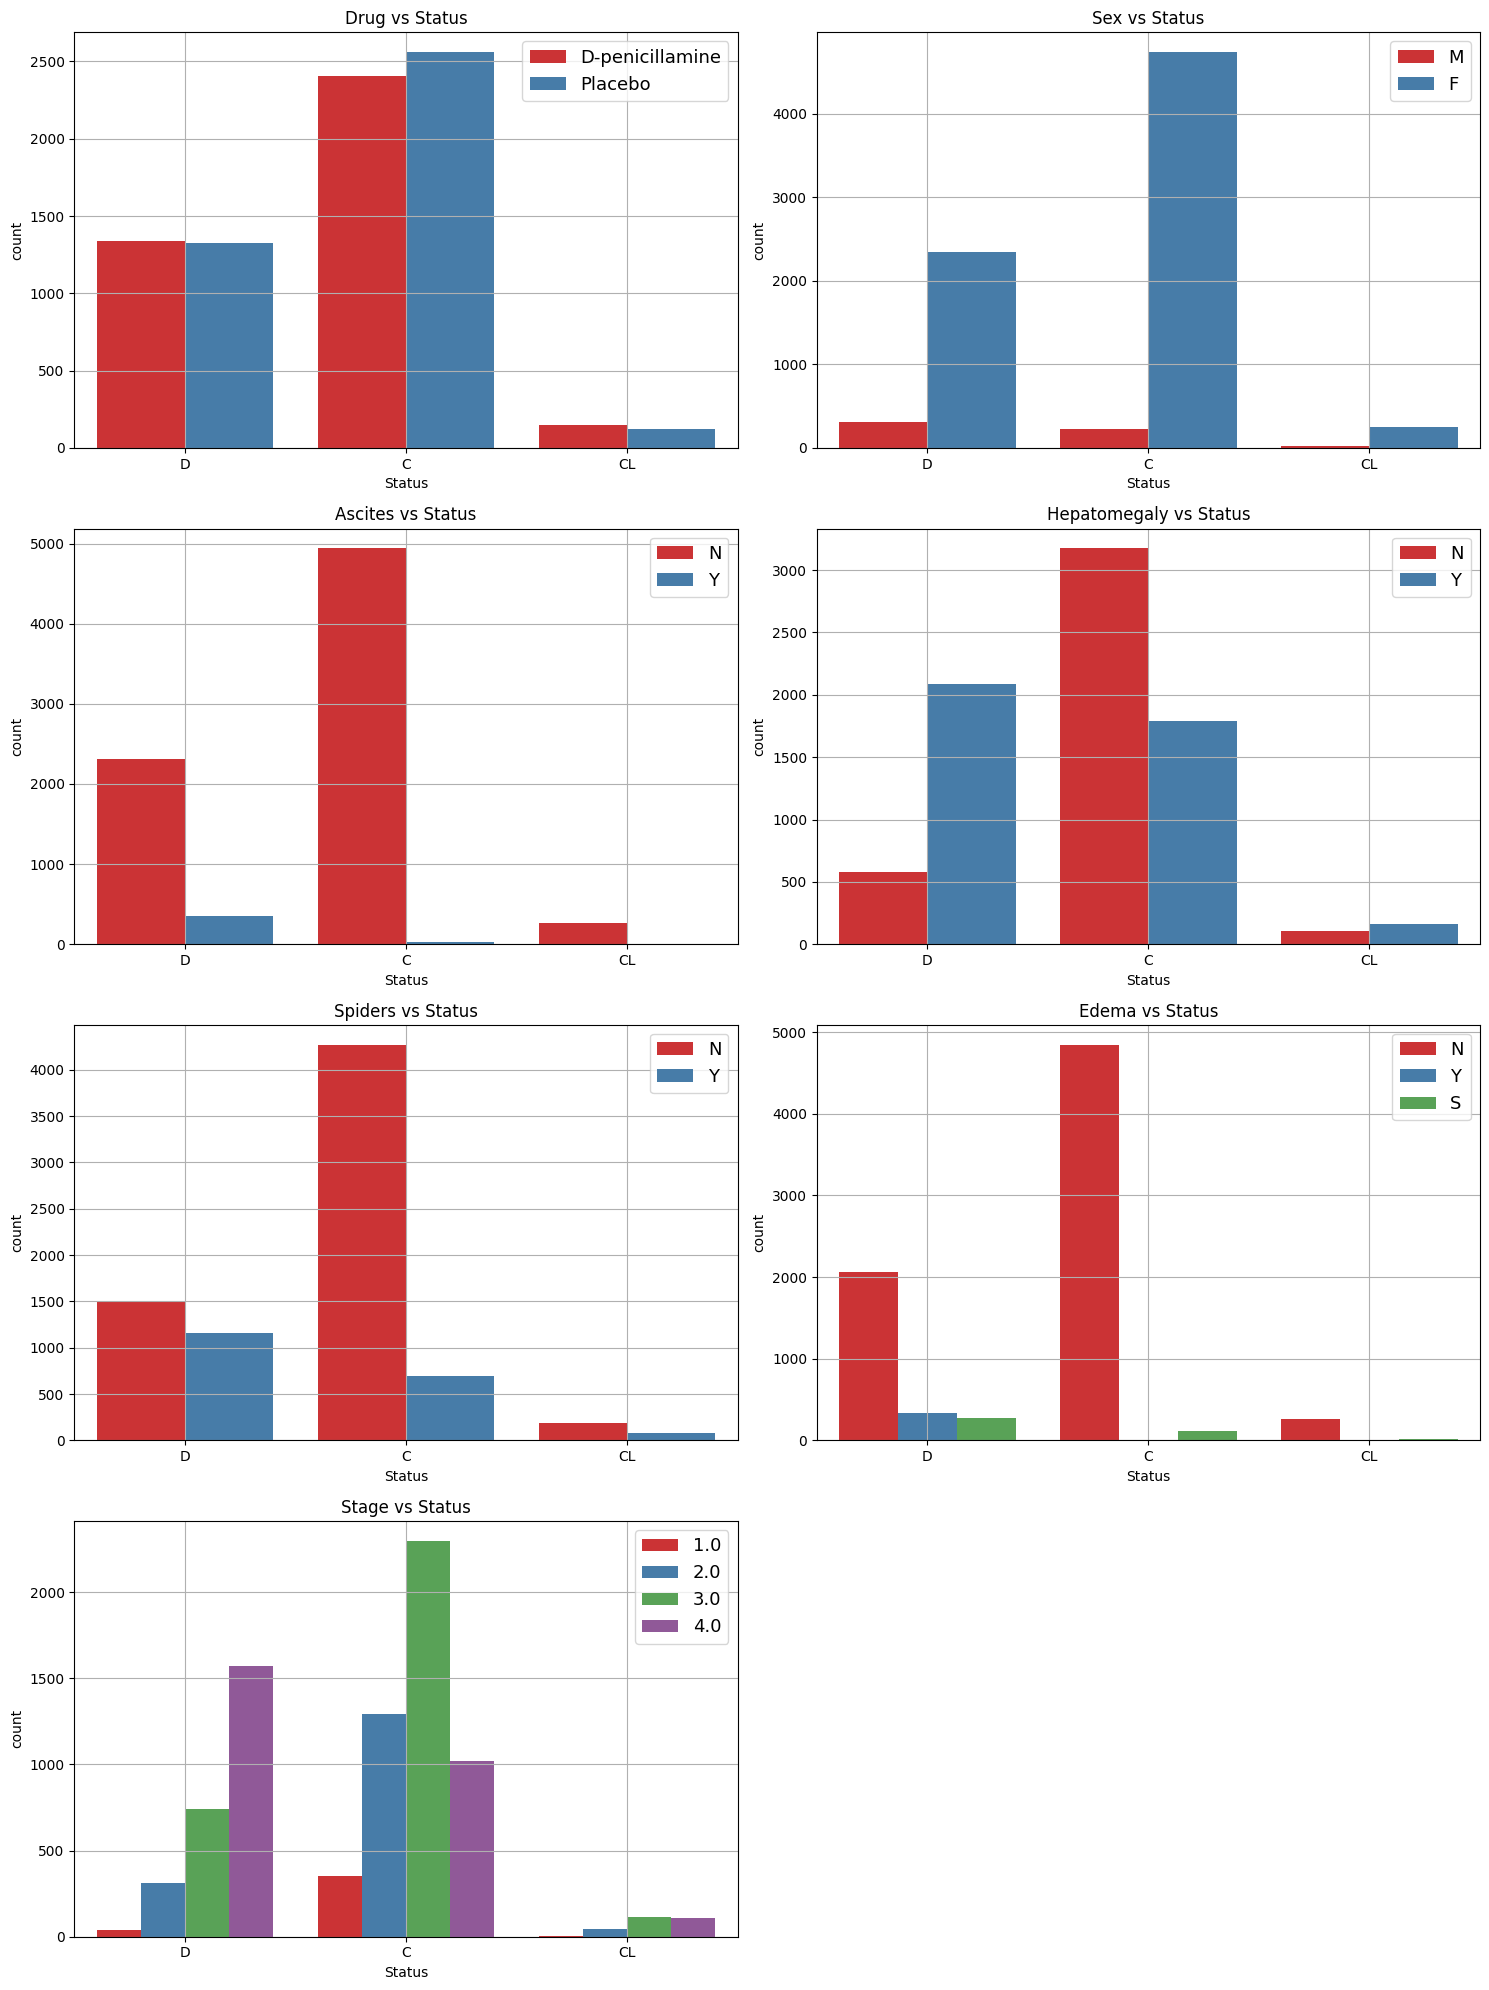

In [235]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(data[cat_data].columns):
  plt.subplot(len(data[cat_data].columns)//2 +1, 2, i + 1)
  sns.countplot(data=data, x='Status', hue=col, palette='Set1')
  plt.title(f"{col} vs {'Status'}")
  plt.legend(fontsize=13)
  plt.tight_layout()
  plt.grid()

### Общий анализ данных

In [236]:
corr_matrix = data[num_data].corr()

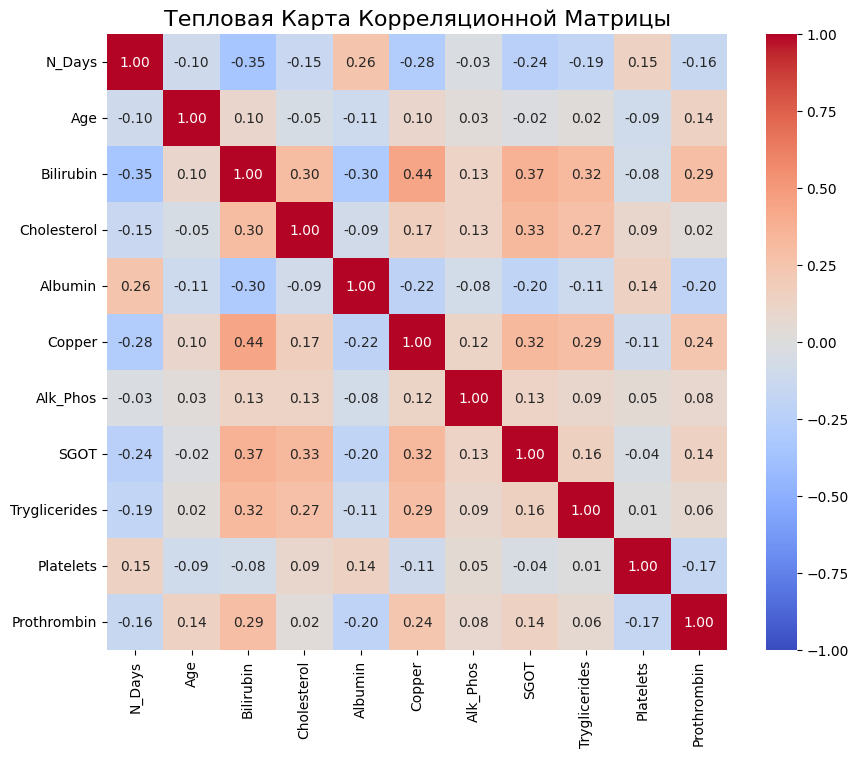

In [237]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(
    corr_matrix, 
    annot=True,   
    fmt=".2f",      
    cmap='coolwarm',
    vmin=-1,        
    vmax=1         
)

plt.title('Тепловая Карта Корреляционной Матрицы', fontsize=16) 
plt.show() 

### Выводы:

В результате анализа следует, что 
- в датасете отсутствуют дубли и пропуски
- нет сильно коррелированных переменных
- имеет дисбаланс целевой классов переменной, один из классов существенно мал
- необходимо перевести в код категориальные признаки
- необходимо убрать выбросы у таких признаков как Tryglicerides, SGOT, Prothrombin, Alk_phos и др.
- необходимо нормализовать/стандартизировать данные, а также для некоторых переменных потребуется перевод в логарифмическую шкалу
- признаки N_days, Age, Bilirubin, Prothrombin, Stage, Hepatomegaly исходя из графиков зависимоти от целевой переменной имеют влияние на распределение трёх классов. 